# Pythia

In [1]:
import pandas
import numpy
from copy import deepcopy

In [2]:
esmif_df = pandas.read_csv("../Pythia/pythia_all_train.csv").rename(str.lower, axis=1) #.drop(["Unnamed: 0"], axis=1)
esmif_df['experimental'] = True
esmif_df

,name,ddg,pythiascore,experimental
0,1a23_H_32_L,5.30,2.005835,True
1,1a23_H_32_S,5.20,-0.754283,True
2,1a23_H_32_Y,6.80,1.915074,True
3,1a43_C_71_S,-3.70,-12.047657,True
4,1a43_E_12_D,-4.55,-9.378929,True
...,...,...,...,...
3313,5pti_Y_35_A,-4.70,-10.573263,True
3314,5pti_Y_35_D,-3.80,-11.602140,True
3315,5pti_Y_35_F,-0.60,-0.648102,True
3316,5pti_Y_35_G,-5.00,-12.547439,True


In [3]:
def go_to_my_format(x):
    for _v, _k in zip(
        x["name"].split("_"), ["pdb_code", "from_aa", "position", "to_aa"]
    ):
        x[_k] = _v
    return x

In [4]:
esmif_df=esmif_df.apply(lambda x: go_to_my_format(x), axis=1)
esmif_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D
...,...,...,...,...,...,...,...,...
3313,5pti_Y_35_A,-4.70,-10.573263,True,5pti,Y,35,A
3314,5pti_Y_35_D,-3.80,-11.602140,True,5pti,Y,35,D
3315,5pti_Y_35_F,-0.60,-0.648102,True,5pti,Y,35,F
3316,5pti_Y_35_G,-5.00,-12.547439,True,5pti,Y,35,G


## plain Pythia

,ddg,pythiascore
ddg,1.000000,0.528188
pythiascore,0.528188,1.000000


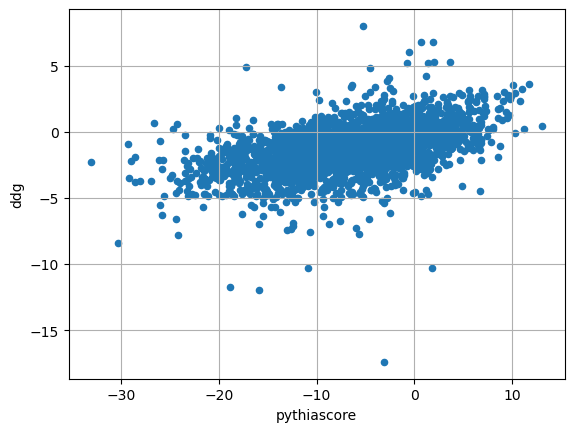

In [5]:
plain_esmif_plot= esmif_df.plot.scatter(x="pythiascore", y="ddg", grid=True)
esmif_df[["ddg", "pythiascore"]].corr()

In [6]:
zegroups=esmif_df.groupby(['pdb_code','position','from_aa']).groups
zegroups

{('1a23', '32', 'H'): [0, 1, 2], ('1a43', '12', 'E'): [4], ('1a43', '20', 'R'): [6], ('1a43', '37', 'W'): [7], ('1a43', '71', 'C'): [3], ('1a43', '9', 'G'): [5], ('1a5e', '121', 'L'): [8], ('1a5e', '15', 'W'): [10], ('1a5e', '37', 'L'): [9], ('1aar', '27', 'K'): [14], ('1aar', '29', 'K'): [15, 16], ('1aar', '42', 'R'): [19], ('1aar', '45', 'F'): [11], ('1aar', '6', 'K'): [17, 18], ('1aar', '68', 'H'): [12, 13], ('1aar', '72', 'R'): [20], ('1aep', '132', 'A'): [21], ('1aep', '136', 'T'): [23], ('1aep', '23', 'T'): [24], ('1aep', '9', 'L'): [22], ('1ag2', '52', 'F'): [26], ('1ag2', '57', 'V'): [33], ('1ag2', '6', 'M'): [28], ('1ag2', '60', 'T'): [31], ('1ag2', '67', 'T'): [32], ('1ag2', '75', 'F'): [27], ('1ag2', '77', 'E'): [25], ('1ag2', '85', 'R'): [30], ('1ag2', '87', 'V'): [34], ('1ag2', '94', 'Q'): [29], ('1aj3', '1', 'H'): [52, 53], ('1aj3', '12', 'S'): [89, 90], ('1aj3', '13', 'W'): [96], ('1aj3', '14', 'I'): [56, 57], ('1aj3', '16', 'E'): [46, 47], ('1aj3', '17', 'K'): [62], ('1

In [7]:
_=zegroups[list(zegroups.keys())[1]]
#_=zegroups[list(zegroups.values())[0]]
testgroup=esmif_df.loc[_]
_, len(_) #testgroup

(Index([4], dtype='int64'), 1)

In [8]:
def augment_single(group):
    testme = deepcopy(group)
    # if len(testme) == 1:
    #    return [dict(testme.iloc[0])]
    testme_aug = []  # pandas.DataFrame() #columns=testme.columns)
    # testme_aug
    _ddg = dict(zip(testme["to_aa"], testme["ddg"]))
    _ll = dict(zip(testme["to_aa"], testme["ll_mut"]))
    _aa = list(_ddg.keys())
    _orig_aa = testme.iloc[0]["from_aa"]
    # print(_orig_aa, _ddg, _aa, _ll)
    # dict(testme.iloc[0])

    while _aa:
        _aug_from = _aa.pop()
        for _ in _aa:
            _aug = dict(testme.iloc[0])
            _aug["from_aa"] = _aug_from
            _aug["to_aa"] = _
            _aug["ll_native"] = _ll[_aug_from]
            _aug["ll_mut"] = _ll[_]
            _aug["delta"] = _aug["ll_mut"] - _aug["ll_native"]
            _aug["ddg"] = _ddg[_] - _ddg[_aug_from]
            _aug["experimental"] = False
            testme_aug.append(_aug)
    return testme_aug

In [9]:
def anti(x):
    #_anti = deepcopy(x)
    x['to_aa'], x['from_aa']  =  x['from_aa'], x['to_aa']
    #x['ll_mut'], x['ll_native']  =  x['ll_native'], x['ll_mut']
    x['ddg'] = -x['ddg']
    x['pythiascore'] = -x['pythiascore']
    x['experimental'] = False
    return x

anti_df = deepcopy(esmif_df).apply(anti, axis=1)

In [10]:
anti_df.shape

(3318, 8)

In [11]:
double_df = pandas.concat([esmif_df,anti_df],ignore_index=True)
assert len(double_df) == 2* len(esmif_df)
double_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D
...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y


,ddg,pythiascore
ddg,1.00000,0.68772
pythiascore,0.68772,1.00000


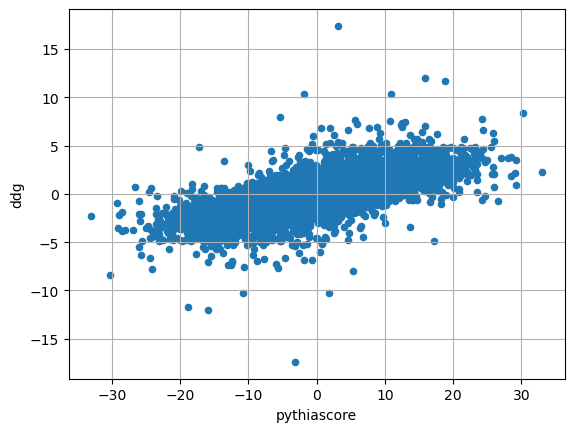

In [12]:
plain_double_plot= double_df.plot.scatter(x="pythiascore", y="ddg", grid=True)
double_df[["ddg", "pythiascore"]].corr()

In [13]:
from sklearn.metrics import mean_squared_error
import math
print ('train RMSE:',math.sqrt(mean_squared_error(double_df['ddg'],double_df['pythiascore'])))

train RMSE: 7.362956118982477


In [14]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
X = double_df["pythiascore"].to_numpy().reshape(-1, 1)
y = double_df["ddg"].to_numpy()
#wgt = double_df["wgt"].to_numpy()
X.shape, y.shape #wgt.shape

((6636, 1), (6636,))

In [16]:
lin = LinearRegression(fit_intercept=True).fit(
    X,
    y,
    #sample_weight=wgt
)

In [17]:
import math

lin.coef_, lin.intercept_, math.sqrt(lin.score(X, y))

(array([0.1585021]), 0.0, 0.6877197827443696)

## Scaled pythia

In [18]:
scaled_pythia_df = deepcopy(double_df)
scale_coef=lin.coef_[0]
scaled_pythia_df['scaled_pythia']=scale_coef*scaled_pythia_df['pythiascore']
#scaled_pythia_df.head()
print ('scaled train RMSE:',math.sqrt(mean_squared_error(scaled_pythia_df['ddg'],scaled_pythia_df['scaled_pythia'])))

scaled train RMSE: 1.4359041953837586


In [19]:
kd = {
    "A": 1.800,
    "R": -4.500,
    "N": -3.500,
    "D": -3.500,
    "C": 2.500,
    "Q": -3.500,
    "E": -3.500,
    "G": -0.400,
    "H": -3.200,
    "I": 4.500,
    "L": 3.800,
    "K": -3.900,
    "M": 1.900,
    "F": 2.800,
    "P": -1.600,
    "S": -0.800,
    "T": -0.700,
    "W": -0.900,
    "Y": -1.300,
    "V": 4.200,
}

In [20]:
#esmif_df.head()
def kd_delta(x):
    x['kd_delta']=kd[x['from_aa']] - kd[x['to_aa']]
    return x
ddfep_df = double_df.apply(kd_delta, 
               axis='columns'
              )

In [21]:
ddfep_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa,kd_delta
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L,-7.0
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S,-2.4
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y,-1.9
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S,3.3
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D,0.0
...,...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y,3.1
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y,-2.2
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y,4.1
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y,0.9


In [22]:
X_fep= ddfep_df[['pythiascore','kd_delta']].to_numpy()

In [23]:
ddfep_model = LinearRegression(fit_intercept=True).fit(
    X_fep,
    y,
    #sample_weight=wgt
)

In [24]:
ddfep_model.coef_, ddfep_model.intercept_, math.sqrt(ddfep_model.score(X_fep, y))

(array([ 0.15786294, -0.04660186]), 0.0, 0.6927447887319114)

In [25]:
ddfep_df['ddfep']=ddfep_model.predict(X_fep)

1.4264233156165431

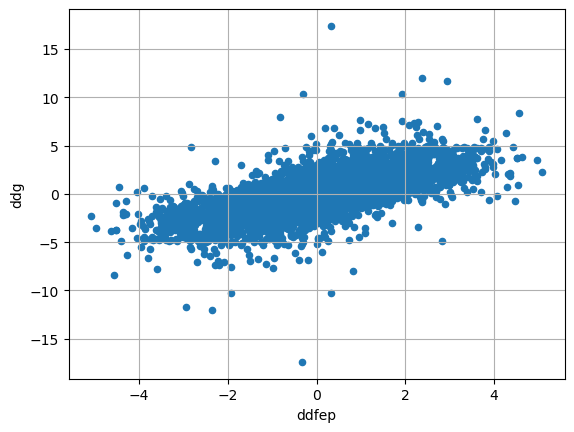

In [26]:
ddfep_plot= ddfep_df.plot.scatter(x='ddfep',y='ddg', grid=True)

math.sqrt(mean_squared_error(ddfep_df['ddg'],ddfep_df['ddfep']))

In [27]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_fep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_fep, y > 0))
rsq

array([0.51151618, 0.46808672, 0.47848568, 0.49606378, 0.44199901,
       0.45610767, 0.45120346, 0.51088257, 0.48447073, 0.4969098 ,
       0.43873282, 0.50614325, 0.48878088, 0.44507535, 0.51611698,
       0.46328447, 0.50355954, 0.49858476, 0.46453955, 0.46799869,
       0.48737083, 0.45469218, 0.51169918, 0.448489  , 0.49678197,
       0.44514388, 0.49523831, 0.49556364, 0.4620221 , 0.49691817,
       0.49602031, 0.46382113, 0.4982745 , 0.43486155, 0.5004782 ,
       0.49582   , 0.45101861, 0.46493316, 0.50010718, 0.48494547,
       0.4760225 , 0.50506356, 0.50201216, 0.44270141, 0.474144  ,
       0.47960322, 0.47994772, 0.47630189, 0.49026154, 0.46956671])

In [28]:
math.sqrt(rsq.mean())

0.6923635748010039

In [29]:
sum([math.sqrt(_) for _ in rsq])/len(rsq)


0.692172541255292

## Rose


In [30]:
rose=pandas.read_csv('rose1985.csv', index_col='Parameter')
rose

,Rose1985
Parameter,
A,86.6
C,132.3
D,97.8
E,113.9
F,194.1
G,62.9
H,155.8
I,158.0
K,115.5


In [31]:
kd = {
    "A": 1.800,
    "R": -4.500,
    "N": -3.500,
    "D": -3.500,
    "C": 2.500,
    "Q": -3.500,
    "E": -3.500,
    "G": -0.400,
    "H": -3.200,
    "I": 4.500,
    "L": 3.800,
    "K": -3.900,
    "M": 1.900,
    "F": 2.800,
    "P": -1.600,
    "S": -0.800,
    "T": -0.700,
    "W": -0.900,
    "Y": -1.300,
    "V": 4.200,
}

In [32]:
#esmif_df.head()
def rose_delta(x):
    x['rose_delta']=rose['Rose1985'][x['from_aa']] - rose['Rose1985'][x['to_aa']]
    return x
ddfep_df = double_df.apply(rose_delta, 
               axis=1
              )

In [33]:
ddfep_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa,rose_delta
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L,-8.3
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S,70.2
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y,-21.9
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S,46.7
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D,16.1
...,...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y,-91.1
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y,-79.9
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y,16.4
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y,-114.8


In [34]:
X_fep= ddfep_df[['pythiascore','rose_delta']].to_numpy()

In [35]:
ddfep_model = LinearRegression(fit_intercept=False).fit(
    X_fep,
    y,
)

In [36]:
ddfep_model.coef_, ddfep_model.intercept_, math.sqrt(ddfep_model.score(X_fep, y))

(array([ 0.1430699 , -0.01052862]), 0.0, 0.7343406047513213)

In [37]:
ddfep_df['ddfep_rose']=ddfep_model.predict(X_fep)

1.3425573401165665

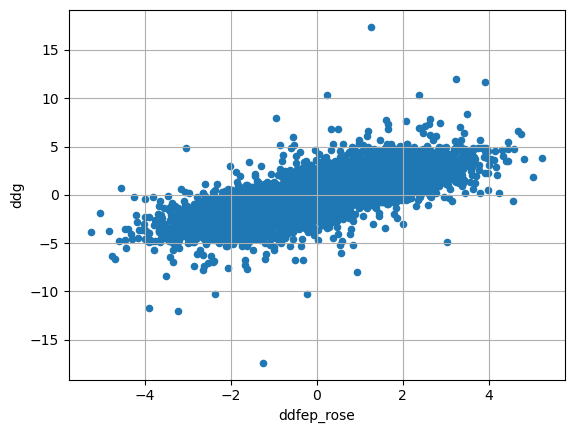

In [38]:
ddfep_plot= ddfep_df.plot.scatter(x='ddfep_rose',y='ddg', grid=True)

math.sqrt(mean_squared_error(ddfep_df['ddg'],ddfep_df['ddfep_rose']))

### Crossvalidate

In [39]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
rsq=cross_val_score(LinearRegression(fit_intercept=False),
                   X_fep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_fep, y > 0))
rsq

array([0.48603813, 0.56401573, 0.55548408, 0.54436626, 0.54768685,
       0.52842498, 0.56681355, 0.54861052, 0.56165624, 0.49165402,
       0.58393933, 0.55501046, 0.5086641 , 0.54086521, 0.5125959 ,
       0.53470447, 0.56952844, 0.56461393, 0.48963807, 0.54598332,
       0.53166582, 0.51940562, 0.52027378, 0.55462534, 0.56614245,
       0.53479692, 0.53948861, 0.55235597, 0.50728264, 0.55974648,
       0.52524587, 0.56577716, 0.58423276, 0.51916568, 0.50492809,
       0.51867475, 0.52434188, 0.54477755, 0.55253652, 0.55578574,
       0.56874431, 0.52596049, 0.5513715 , 0.52866662, 0.52311695,
       0.51736371, 0.56009762, 0.52402692, 0.5536006 , 0.5378864 ])

In [40]:
math.sqrt(rsq.mean())

0.7344709433208453

In [41]:
numpy.sqrt(rsq).mean(), numpy.sqrt(rsq).std()

(0.7342961857349706, 0.01602117965962076)

In [42]:
sum([math.sqrt(_) for _ in rsq])/len(rsq)


0.7342961857349706

## ddFEP w. optimized aa. DG(aq)

In [43]:
#ddfep_opt = deepcopy(double_df)
ddfep_opt = deepcopy(ddfep_df)
for _ in sorted(kd.keys()):
    ddfep_opt[_] = 0
ddfep_opt

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa,rose_delta,ddfep_rose,...,M,N,P,Q,R,S,T,V,W,Y
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L,-8.3,0.374362,...,0,0,0,0,0,0,0,0,0,0
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S,70.2,-0.847024,...,0,0,0,0,0,0,0,0,0,0
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y,-21.9,0.504566,...,0,0,0,0,0,0,0,0,0,0
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S,46.7,-2.215343,...,0,0,0,0,0,0,0,0,0,0
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D,16.1,-1.511353,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y,-91.1,2.471873,...,0,0,0,0,0,0,0,0,0,0
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y,-79.9,2.501153,...,0,0,0,0,0,0,0,0,0,0
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y,16.4,-0.079945,...,0,0,0,0,0,0,0,0,0,0
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y,-114.8,3.003846,...,0,0,0,0,0,0,0,0,0,0


In [44]:
def encode_mutation(x):
    x[x['from_aa']]= -1
    x[x['to_aa']] = 1
    return x

In [45]:
ddfep_opt = ddfep_opt.apply(encode_mutation, axis='columns')

In [46]:
### fit test

In [47]:
X_optfep= ddfep_opt[['pythiascore']+sorted(kd.keys())].to_numpy()
X_optfep.shape

(6636, 21)

In [48]:
dd_optfep_model = LinearRegression(fit_intercept=True).fit(
    X_optfep,
    y,
)

In [49]:
dd_optfep_model.coef_, dd_optfep_model.intercept_, math.sqrt(dd_optfep_model.score(X_optfep, y))

(array([ 0.14482661, -0.37418751,  0.27896217, -0.58849571, -0.25047661,
         0.44999147, -0.72959189, -0.06261135,  0.54938204, -0.41624436,
         0.33285861,  0.73166655, -0.42678213, -0.26697308, -0.39263795,
         0.30593624, -0.54498475, -0.49387366,  0.08891944,  1.06344073,
         0.74570174]),
 0.0,
 0.7442619043076333)

#### ddMBC coefs

In [50]:
coefs=dict(zip(["delta"] + sorted(kd.keys()), dd_optfep_model.coef_))
coefs

{'delta': 0.14482660708456985,
 'A': -0.37418751100726744,
 'C': 0.2789621708360303,
 'D': -0.5884957089057815,
 'E': -0.2504766135110062,
 'F': 0.4499914662063453,
 'G': -0.7295918854986836,
 'H': -0.0626113462380614,
 'I': 0.5493820432687265,
 'K': -0.41624436289575456,
 'L': 0.3328586055210751,
 'M': 0.7316665454753128,
 'N': -0.4267821297672741,
 'P': -0.26697308113885093,
 'Q': -0.3926379453562735,
 'R': 0.30593623933785596,
 'S': -0.5449847456204918,
 'T': -0.4938736579046231,
 'V': 0.08891944314078191,
 'W': 1.0634407329142717,
 'Y': 0.7457017411436713}

In [51]:
coefs_df = pandas.DataFrame({'Pythia': coefs})
coefs_df
#coefs_df.to_csv('pythia_params.csv')

,Pythia
delta,0.144827
A,-0.374188
C,0.278962
D,-0.588496
E,-0.250477
F,0.449991
G,-0.729592
H,-0.062611
I,0.549382
K,-0.416244


In [52]:
ddfep_opt['ddfep_opt']=dd_optfep_model.predict(X_optfep)

In [53]:
#ddfep_opt[["name", "ddg", "pythiascore", "ddfep_opt"]].rename(
#    {"ddfep_opt": "pythia_ddmbc"}, axis=1).to_csv("pythia_ddmbc_train.csv")

1.3210115621219487

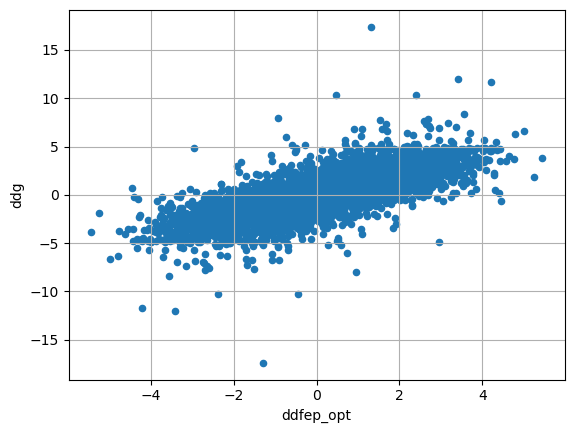

In [54]:
ddfep_opt_plot = ddfep_opt.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
math.sqrt(mean_squared_error(ddfep_opt['ddg'],ddfep_opt['ddfep_opt']))

In [55]:
ddfep_opt[['ddg','ddfep_rose','ddfep_opt']].corr()

,ddg,ddfep_rose,ddfep_opt
ddg,1.000000,0.734341,0.744262
ddfep_rose,0.734341,1.000000,0.986670
ddfep_opt,0.744262,0.986670,1.000000


### Crossvalidate

In [56]:
optfep_rsq=cross_val_score(LinearRegression(fit_intercept=True),
                   X_optfep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_optfep, y > 0))
optfep_rsq

array([0.55533888, 0.59287502, 0.51970811, 0.5696145 , 0.52316439,
       0.56215604, 0.51103598, 0.54715988, 0.58379417, 0.55251301,
       0.59405253, 0.51481806, 0.54358863, 0.51682453, 0.58263535,
       0.56288504, 0.54438272, 0.54636217, 0.56207928, 0.53533679,
       0.5344923 , 0.55933138, 0.53663328, 0.5360774 , 0.59287049,
       0.50330084, 0.53894626, 0.59202938, 0.5401771 , 0.57194266,
       0.61060643, 0.5418152 , 0.5178996 , 0.5921037 , 0.50699192,
       0.58269482, 0.55064665, 0.5202062 , 0.55221113, 0.5438549 ,
       0.56199513, 0.57328852, 0.52010272, 0.56074381, 0.5363766 ,
       0.51867911, 0.55513728, 0.54935173, 0.54901543, 0.58448847])

In [57]:
numpy.sqrt(optfep_rsq).mean(), numpy.sqrt(optfep_rsq).std()

(0.7421434646925529, 0.017600807525251512)

In [58]:
sum([math.sqrt(_) for _ in optfep_rsq])/len(optfep_rsq)


0.7421434646925529

## Test on S669

In [59]:
esmif_s669_df = (
    pandas.read_csv("../Pythia/pythia_s669_augd.csv", index_col=None)
    .rename(str.lower, axis=1)
    .apply(lambda x: go_to_my_format(x), axis=1)
)
#esmif_s669_df['experimental']=True
esmif_s669_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H
...,...,...,...,...,...,...,...
664,5jxb_D_25_P,-1.440,-5.337091,5jxb,D,25,P
665,5oaq_Y_199_H,-2.990,-13.397189,5oaq,Y,199,H
666,5vp3_S_128_G,-0.378,-8.731921,5vp3,S,128,G
667,5vp3_V_183_T,0.354,-3.005847,5vp3,V,183,T


In [60]:
s669_in=pandas.read_csv('../Pythia/s669_pythia_in.csv').drop(['Unnamed: 0'], axis=1)
s669_in

,pdb,mut_format,ddg,chain,wildtype,resseq,mutation
0,1a0f,SA11A,-1.800,A,S,11,A
1,1a7v,AA104H,-2.690,A,A,104,H
2,1a7v,KA13H,-0.600,A,K,13,H
3,1a7v,KA20H,-2.880,A,K,20,H
4,1a7v,DA3H,-1.360,A,D,3,H
...,...,...,...,...,...,...,...
664,5jxb,DA329P,-1.440,A,D,329,P
665,5oaq,YA429H,-2.990,A,Y,429,H
666,5vp3,SA128G,-0.378,A,S,128,G
667,5vp3,VA183T,0.354,A,V,183,T


In [61]:
esmif_s669_df['chain']=s669_in['chain']

In [62]:
esmif_s669_rev_df = deepcopy(esmif_s669_df).apply(anti, axis=1)
esmif_s669_df['experimental']=True
esmif_s669_rev_df['experimental']=False
esmif_s669_df.shape, esmif_s669_rev_df.shape

((669, 9), (669, 9))

In [63]:
esmif_s669_sym_df= pandas.concat([ esmif_s669_df, esmif_s669_rev_df], ignore_index=True)
esmif_s669_sym_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,chain,experimental
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A,A,True
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H,A,True
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H,A,True
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H,A,True
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H,A,True
...,...,...,...,...,...,...,...,...,...
1333,5jxb_D_25_P,1.440,5.337091,5jxb,P,25,D,A,False
1334,5oaq_Y_199_H,2.990,13.397189,5oaq,H,199,Y,A,False
1335,5vp3_S_128_G,0.378,8.731921,5vp3,G,128,S,A,False
1336,5vp3_V_183_T,-0.354,3.005847,5vp3,T,183,V,A,False


In [65]:
esmif_s669_sym_df=esmif_s669_sym_df.apply(rose_delta,axis=1)
esmif_s669_sym_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,chain,experimental,rose_delta
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A,A,True,-1.0
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H,A,True,-69.2
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H,A,True,-40.3
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H,A,True,-40.3
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H,A,True,-58.0
...,...,...,...,...,...,...,...,...,...,...
1333,5jxb_D_25_P,1.440,5.337091,5jxb,P,25,D,A,False,-4.9
1334,5oaq_Y_199_H,2.990,13.397189,5oaq,H,199,Y,A,False,-21.9
1335,5vp3_S_128_G,0.378,8.731921,5vp3,G,128,S,A,False,-22.7
1336,5vp3_V_183_T,-0.354,3.005847,5vp3,T,183,V,A,False,-34.5


In [66]:
for _ in sorted(kd.keys()):
    esmif_s669_sym_df[_] = 0
esmif_s669_sym_df= esmif_s669_sym_df.apply(encode_mutation, axis='columns')
esmif_s669_sym_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,chain,experimental,rose_delta,...,M,N,P,Q,R,S,T,V,W,Y
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A,A,True,-1.0,...,0,0,0,0,0,-1,0,0,0,0
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H,A,True,-69.2,...,0,0,0,0,0,0,0,0,0,0
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H,A,True,-40.3,...,0,0,0,0,0,0,0,0,0,0
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H,A,True,-40.3,...,0,0,0,0,0,0,0,0,0,0
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H,A,True,-58.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,5jxb_D_25_P,1.440,5.337091,5jxb,P,25,D,A,False,-4.9,...,0,0,-1,0,0,0,0,0,0,0
1334,5oaq_Y_199_H,2.990,13.397189,5oaq,H,199,Y,A,False,-21.9,...,0,0,0,0,0,0,0,0,0,1
1335,5vp3_S_128_G,0.378,8.731921,5vp3,G,128,S,A,False,-22.7,...,0,0,0,0,0,1,0,0,0,0
1336,5vp3_V_183_T,-0.354,3.005847,5vp3,T,183,V,A,False,-34.5,...,0,0,0,0,0,0,-1,1,0,0


In [68]:
X_s669=esmif_s669_sym_df[['pythiascore']+sorted(kd.keys())].to_numpy()
X_s669_rose=esmif_s669_sym_df[['pythiascore','rose_delta']].to_numpy()
#y_s669_af=esmif_af_df['ddg'].to_numpy()

In [69]:
esmif_s669_sym_df['ddfep_rose']=ddfep_model.predict(X_s669_rose)

In [70]:
esmif_s669_sym_df['ddfep_opt']=dd_optfep_model.predict(X_s669)

### ddMBC plot

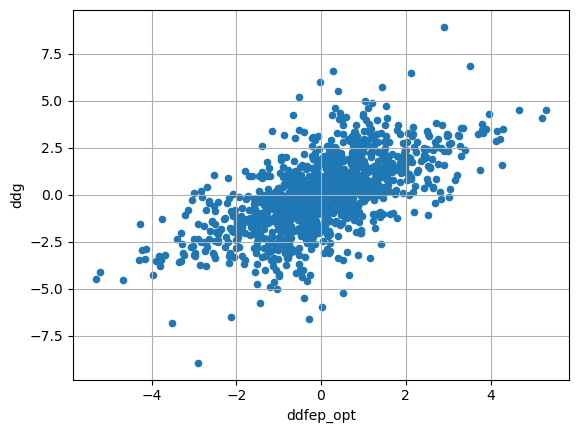

In [71]:
esmif_s669_sym_plot = esmif_s669_sym_df.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

#math.sqrt(dd_optfep_model.score(X_s669, y_s669))

### Rose plot

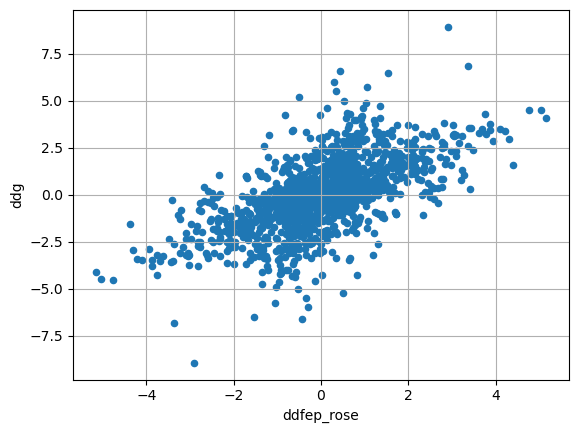

In [72]:
esmif_s669_sym_plot = esmif_s669_sym_df.plot.scatter(x='ddfep_rose',y='ddg', grid=True)

#math.sqrt(dd_optfep_model.score(X_s669, y_s669))

### RMSE and corr

In [73]:
for _ in ['ddfep_opt','ddfep_rose']:
    print('S669', _, math.sqrt(mean_squared_error(esmif_s669_sym_df['ddg'],esmif_s669_sym_df[_])))

S669 ddfep_opt 1.4819682406985377
S669 ddfep_rose 1.483597869096109


In [75]:
esmif_s669_sym_df[['ddg','ddfep_opt','ddfep_rose','pythiascore']].corr()

,ddg,ddfep_opt,ddfep_rose,pythiascore
ddg,1.000000,0.631811,0.630825,0.561723
ddfep_opt,0.631811,1.000000,0.984286,0.907122
ddfep_rose,0.630825,0.984286,1.000000,0.928684
pythiascore,0.561723,0.907122,0.928684,1.000000


### experimental only

,ddg,ddfep_opt,ddfep_rose
ddg,1.000000,0.465435,0.452250
ddfep_opt,0.465435,1.000000,0.975959
ddfep_rose,0.452250,0.975959,1.000000


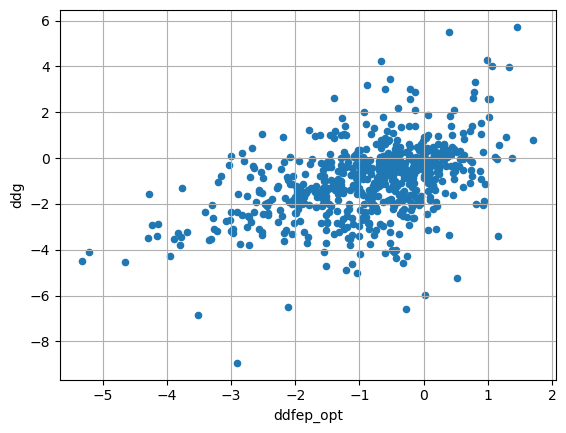

In [77]:
# parts
exp_filter=(esmif_s669_sym_df['experimental'] == True)
rev_filter=(esmif_s669_sym_df['experimental'] == False)
esmif_s669_exp_plot = esmif_s669_sym_df[exp_filter].plot.scatter(x='ddfep_opt',y='ddg', grid=True)
display(esmif_s669_sym_df[exp_filter][['ddg','ddfep_opt','ddfep_rose']].corr())
#display(esmif_s669_sym_df[(rev_filter)][['ddg','ddfep_opt']].corr


In [78]:
_ef=esmif_s669_sym_df[exp_filter][['ddg','ddfep_opt']]
math.sqrt(mean_squared_error(_ef['ddg'],_ef['ddfep_opt']))

1.4819682406985377

In [79]:
# only esmi-if
esmif_s669_df[['ddg','pythiascore']].corr()
math.sqrt(mean_squared_error(esmif_s669_df['ddg'],esmif_s669_df['pythiascore']))

7.160282560953511

### S669: Alphafold models w. pdb correction

In [80]:
s669_af = (
    pandas.read_csv("../Pythia/pythia_s669_af.csv")
    .rename(str.lower,axis=1)
    .apply(lambda x: go_to_my_format(x), axis=1)
)
s669_af['experimental']=True
_af_anti= s669_af.apply(anti,axis=1)
_af_anti['experimental']=False
s669_af=pandas.concat([s669_af,_af_anti], ignore_index=True)
s669_af

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,experimental
0,1A0F_S_11_A,-1.800,-3.740673,1A0F,S,11,A,True
1,1A7V_A_104_H,-2.690,-9.710157,1A7V,A,104,H,True
2,1A7V_A_66_H,-1.980,-1.679052,1A7V,A,66,H,True
3,1A7V_A_91_H,-1.700,-5.408050,1A7V,A,91,H,True
4,1A7V_D_3_H,-1.360,-4.406081,1A7V,D,3,H,True
...,...,...,...,...,...,...,...,...
1333,5JXB_D_25_P,1.440,16.341722,5JXB,P,25,D,False
1334,5OAQ_Y_199_H,2.990,7.114707,5OAQ,H,199,Y,False
1335,5VP3_R_39_K,-0.413,2.284750,5VP3,K,39,R,False
1336,5VP3_S_128_G,0.378,8.801229,5VP3,G,128,S,False


In [82]:
s669_af=s669_af.apply(rose_delta,axis=1)

In [83]:
for _ in sorted(kd.keys()):
    s669_af[_] = 0
s669_af= s669_af.apply(encode_mutation, axis='columns')
s669_af

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,experimental,rose_delta,A,...,M,N,P,Q,R,S,T,V,W,Y
0,1A0F_S_11_A,-1.800,-3.740673,1A0F,S,11,A,True,-1.0,1,...,0,0,0,0,0,-1,0,0,0,0
1,1A7V_A_104_H,-2.690,-9.710157,1A7V,A,104,H,True,-69.2,-1,...,0,0,0,0,0,0,0,0,0,0
2,1A7V_A_66_H,-1.980,-1.679052,1A7V,A,66,H,True,-69.2,-1,...,0,0,0,0,0,0,0,0,0,0
3,1A7V_A_91_H,-1.700,-5.408050,1A7V,A,91,H,True,-69.2,-1,...,0,0,0,0,0,0,0,0,0,0
4,1A7V_D_3_H,-1.360,-4.406081,1A7V,D,3,H,True,-58.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,5JXB_D_25_P,1.440,16.341722,5JXB,P,25,D,False,-4.9,0,...,0,0,-1,0,0,0,0,0,0,0
1334,5OAQ_Y_199_H,2.990,7.114707,5OAQ,H,199,Y,False,-21.9,0,...,0,0,0,0,0,0,0,0,0,1
1335,5VP3_R_39_K,-0.413,2.284750,5VP3,K,39,R,False,-46.7,0,...,0,0,0,0,1,0,0,0,0,0
1336,5VP3_S_128_G,0.378,8.801229,5VP3,G,128,S,False,-22.7,0,...,0,0,0,0,0,1,0,0,0,0


#### ddMBC and Rose

In [87]:
X_s669_af=s669_af[['pythiascore']+sorted(kd.keys())].to_numpy()
X_s669_rose_af=s669_af[['pythiascore','rose_delta']].to_numpy()
#y_s669_af=esmif_af_df['ddg'].to_numpy()

In [88]:
s669_af['ddfep_rose']=ddfep_model.predict(X_s669_rose_af)

In [89]:
s669_af['ddfep_opt']=dd_optfep_model.predict(X_s669_af)

#### AF Plots

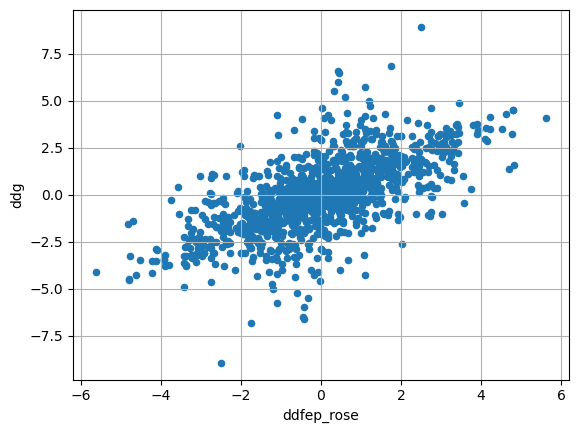

In [91]:
s669_af_rose_plot = s669_af.plot.scatter(x='ddfep_rose',y='ddg', grid=True)

#math.sqrt(dd_optfep_model.score(X_s669, y_s669))

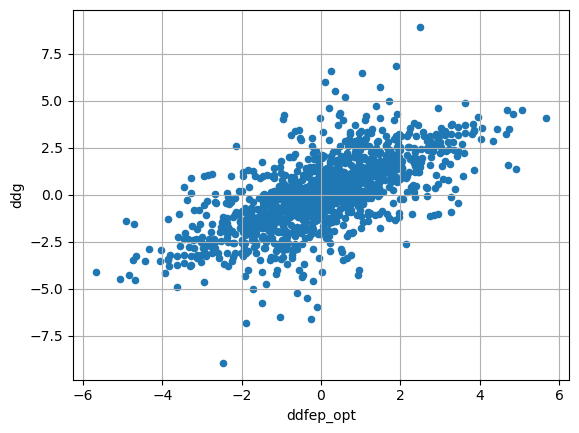

In [90]:
s669_af_plot = s669_af.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

#math.sqrt(dd_optfep_model.score(X_s669, y_s669))

### RMSE and corr

In [93]:
for _ in ['ddfep_opt','ddfep_rose']:
    print('S669 AF', _, math.sqrt(mean_squared_error(s669_af['ddg'],s669_af[_])))

S669 AF ddfep_opt 1.4666272392260549
S669 AF ddfep_rose 1.4772373393807898


In [95]:
s669_af[['ddg','ddfep_opt','ddfep_rose','pythiascore']].corr()

,ddg,ddfep_opt,ddfep_rose,pythiascore
ddg,1.000000,0.660758,0.655981,0.616194
ddfep_opt,0.660758,1.000000,0.988386,0.934220
ddfep_rose,0.655981,0.988386,1.000000,0.951270
pythiascore,0.616194,0.934220,0.951270,1.000000


In [96]:
math.sqrt(mean_squared_error(s669_af['ddg'],s669_af['ddfep_opt']))

1.4666272392260549

In [97]:
s669_af[['ddg','ddfep_opt','pythiascore']].corr()
math.sqrt(mean_squared_error(s669_af['ddg'],s669_af['pythiascore']))

8.348845465217211

In [98]:
s669_af[s669_af['experimental'] == True][['ddg','ddfep_opt','pythiascore']].corr()

,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.504531,0.431051
ddfep_opt,0.504531,1.000000,0.882669
pythiascore,0.431051,0.882669,1.000000


## S461 

In [ ]:
#esmif_s669_sym_df[esmif_s669_sym_df['s461']==True][['ddg','ddfep_opt','pythiascore']].corr()

In [99]:
s461_df=pandas.read_csv('../Pythia/S461.mut',sep=' ')

In [100]:
## extract mutations to simpler csv
s461_mutations = pandas.DataFrame(s461_df['ddg'])
s461_mutations['pdb_code'] = s461_df['pdb'].apply(lambda x: x[:4].lower())
s461_mutations['chain'] = s461_df['pdb'].apply(lambda x: x[-1].upper())
s461_mutations['position'] = s461_df['mut'].apply(lambda x: int(x[1:-1]))
s461_mutations['from_aa'] = s461_df['mut'].apply(lambda x: x[0].upper())
s461_mutations['to_aa'] = s461_df['mut'].apply(lambda x: x[-1].upper())
s461_mutations['name']= s461_mutations.apply(lambda x: '_'.join([ x['pdb_code'],
                                                          x['from_aa'],
                                                          str(x['position']),
                                                          x['to_aa'],
                                                         ]), axis=1)
s461_mutations

,ddg,pdb_code,chain,position,from_aa,to_aa,name
0,-1.800,1a0f,A,11,S,A,1a0f_S_11_A
1,-1.745,1ba3,A,461,H,D,1ba3_H_461_D
2,0.287,1ba3,A,489,H,D,1ba3_H_489_D
3,-0.287,1ba3,A,489,H,K,1ba3_H_489_K
4,-0.263,1ba3,A,489,H,M,1ba3_H_489_M
...,...,...,...,...,...,...,...
456,0.060,4he7,A,19,A,G,4he7_A_19_G
457,-0.460,4he7,A,19,A,K,4he7_A_19_K
458,-1.440,5jxb,A,329,D,G,5jxb_D_329_G
459,-1.440,5jxb,A,329,D,P,5jxb_D_329_P


In [101]:
esmif_s669_sym_df['s461']=esmif_s669_sym_df.apply(lambda x: x['pdb_code'] in list(s461_mutations['pdb_code']), axis=1)

In [102]:
#esmif_s669_sym_df['s461']=esmif_s669_sym_df.apply(lambda x: mut_hash(x) in s461_hashes,axis=1)
esmif_s461_df= esmif_s669_sym_df[esmif_s669_sym_df['s461'] == True]

### experimental

/tmp/ipykernel_66439/3602046572.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  esmif_s461_plot = esmif_s461_df[exp_filter].plot.scatter(x='ddfep_opt',y='ddg', grid=True)
/tmp/ipykernel_66439/3602046572.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(esmif_s461_df[exp_filter][['ddg','ddfep_opt','ddfep_rose','pythiascore']].corr())


,ddg,ddfep_opt,ddfep_rose,pythiascore
ddg,1.000000,0.555807,0.539438,0.425031
ddfep_opt,0.555807,1.000000,0.978776,0.870962
ddfep_rose,0.539438,0.978776,1.000000,0.897991
pythiascore,0.425031,0.870962,0.897991,1.000000


/tmp/ipykernel_66439/3602046572.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(ddfep):',math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_opt'])))
/tmp/ipykernel_66439/3602046572.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(ddfep):',math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_opt'])))
/tmp/ipykernel_66439/3602046572.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(ddfep_rose):',math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_rose'])))
/tmp/ipykernel_66439/3602046572.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(ddfep_rose):',math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_rose'])))
/tmp/ipykernel_66439/360

RMSE(ddfep): 1.1336758015758561
RMSE(ddfep_rose): 1.1306644551346963
RMSE(pythiascore): 7.390213195496487


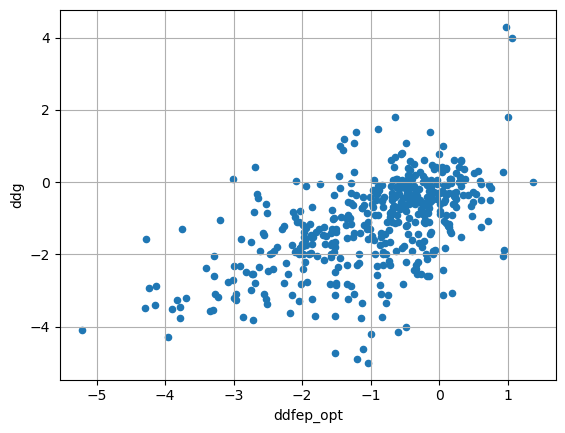

In [104]:
esmif_s461_plot = esmif_s461_df[exp_filter].plot.scatter(x='ddfep_opt',y='ddg', grid=True)
display(esmif_s461_df[exp_filter][['ddg','ddfep_opt','ddfep_rose','pythiascore']].corr())
print('RMSE(ddfep):',math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_opt'])))
print('RMSE(ddfep_rose):',math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_rose'])))
print('RMSE(pythiascore):', math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['pythiascore'])))

In [105]:
esmif_s461_df[['ddg','ddfep_opt', 'ddfep,rose','pythiascore']].corr()

KeyError: "['ddfep,rose'] not in index"

### Alphafold models for 461

In [106]:
#s669_af

In [107]:
s669_af['s461']=s669_af.apply(lambda x: x['pdb_code'].lower() in list(s461_mutations['pdb_code']), axis=1)
s669_af

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,experimental,rose_delta,A,...,Q,R,S,T,V,W,Y,ddfep_rose,ddfep_opt,s461
0,1A0F_S_11_A,-1.800,-3.740673,1A0F,S,11,A,True,-1.0,1,...,0,0,-1,0,0,0,0,-0.524649,-0.370952,True
1,1A7V_A_104_H,-2.690,-9.710157,1A7V,A,104,H,True,-69.2,-1,...,0,0,0,0,0,0,0,-0.660651,-1.094713,False
2,1A7V_A_66_H,-1.980,-1.679052,1A7V,A,66,H,True,-69.2,-1,...,0,0,0,0,0,0,0,0.488358,0.068405,False
3,1A7V_A_91_H,-1.700,-5.408050,1A7V,A,91,H,True,-69.2,-1,...,0,0,0,0,0,0,0,-0.045149,-0.471653,False
4,1A7V_D_3_H,-1.360,-4.406081,1A7V,D,3,H,True,-58.0,0,...,0,0,0,0,0,0,0,-0.019718,-0.112233,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,5JXB_D_25_P,1.440,16.341722,5JXB,P,25,D,False,-4.9,0,...,0,0,0,0,0,0,0,2.389599,2.045193,True
1334,5OAQ_Y_199_H,2.990,7.114707,5OAQ,H,199,Y,False,-21.9,0,...,0,0,0,0,0,0,1,1.248477,1.838712,True
1335,5VP3_R_39_K,-0.413,2.284750,5VP3,K,39,R,False,-46.7,0,...,0,1,0,0,0,0,0,0.818565,1.053073,False
1336,5VP3_S_128_G,0.378,8.801229,5VP3,G,128,S,False,-22.7,0,...,0,0,1,0,0,0,0,1.498191,1.459259,False


In [108]:
s461_af=deepcopy(s669_af[s669_af['s461'] ==True])
s461_af

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,experimental,rose_delta,A,...,Q,R,S,T,V,W,Y,ddfep_rose,ddfep_opt,s461
0,1A0F_S_11_A,-1.800,-3.740673,1A0F,S,11,A,True,-1.0,1,...,0,0,-1,0,0,0,0,-0.524649,-0.370952,True
14,1BA3_H_457_D,-1.745,-4.656702,1BA3,H,457,D,True,58.0,0,...,0,0,0,0,0,0,0,-1.276894,-1.200299,True
15,1BA3_H_485_D,0.287,4.696040,1BA3,H,485,D,True,58.0,0,...,0,0,0,0,0,0,0,0.061202,0.154227,True
16,1BA3_H_485_K,-0.287,5.389668,1BA3,H,485,K,True,40.3,0,...,0,0,0,0,0,0,0,0.346796,0.426934,True
17,1BA3_H_485_M,-0.263,-3.169088,1BA3,H,485,M,True,-17.1,0,...,0,0,0,0,0,0,0,-0.273362,0.335310,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,4HE7_A_18_G,-0.060,-0.885346,4HE7,G,18,A,False,-23.7,1,...,0,0,0,0,0,0,0,0.122862,0.227183,True
1323,4HE7_A_18_K,0.460,-2.194721,4HE7,K,18,A,False,28.9,1,...,0,0,0,0,0,0,0,-0.618276,-0.275797,True
1332,5JXB_D_25_G,1.440,1.633052,5JXB,G,25,D,False,-34.9,0,...,0,0,0,0,0,0,0,0.601089,0.377606,True
1333,5JXB_D_25_P,1.440,16.341722,5JXB,P,25,D,False,-4.9,0,...,0,0,0,0,0,0,0,2.389599,2.045193,True


,ddg,ddfep_opt,ddfep_rose,pythiascore
ddg,1.000000,0.813814,0.810880,0.771950
ddfep_opt,0.813814,1.000000,0.990883,0.949916
ddfep_rose,0.810880,0.990883,1.000000,0.962133
pythiascore,0.771950,0.949916,0.962133,1.000000


RMSE(ddfep): 1.0414979734572243
RMSE(ddfep_rose): 1.0550017183554845
RMSE(pythiascore): 8.698969743865858


/tmp/ipykernel_66439/1000312285.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(pythiascore):', math.sqrt(mean_squared_error(s461_af[exp_filter]['ddg'],s461_af[exp_filter]['pythiascore'])))
/tmp/ipykernel_66439/1000312285.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('RMSE(pythiascore):', math.sqrt(mean_squared_error(s461_af[exp_filter]['ddg'],s461_af[exp_filter]['pythiascore'])))


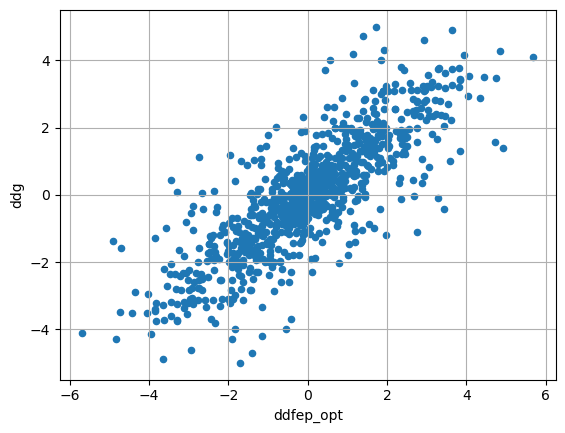

In [109]:
pythia_s461_af_plot = s461_af.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
display(s461_af[['ddg','ddfep_opt','ddfep_rose','pythiascore']].corr())
print('RMSE(ddfep):',math.sqrt(mean_squared_error(s461_af['ddg'],s461_af['ddfep_opt'])))
print('RMSE(ddfep_rose):',math.sqrt(mean_squared_error(s461_af['ddg'],s461_af['ddfep_rose'])))
print('RMSE(pythiascore):', math.sqrt(mean_squared_error(s461_af[exp_filter]['ddg'],s461_af[exp_filter]['pythiascore'])))

In [110]:
s461_af[s461_af['experimental']==True][['ddg','ddfep_opt','pythiascore']].corr()

,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.657579,0.577607
ddfep_opt,0.657579,1.000000,0.899876
pythiascore,0.577607,0.899876,1.000000


## Test on SSYM (for ref.3)

### data preparation

In [ ]:
ssym_dir_df= pandas.read_csv('ssym_dir_pythia.csv').drop('Unnamed: 0', axis=1)
ssym_dir_df['direct']=True
ssym_dir_df

In [ ]:
ssym_inv_df= pandas.read_csv('ssym_inv_pythia.csv').drop('Unnamed: 0', axis=1)
ssym_inv_df['direct']=False
ssym_inv_df

In [ ]:
def encode_ssym_mutation(x):
    x[x["mutation"][0]] = -1
    x[x["mutation"][-1]] = 1
    return x

In [ ]:
_ssym_raw = pandas.concat([ssym_dir_df, ssym_inv_df])
for _ in sorted(kd.keys()):
    _ssym_raw[_] = 0
ssym_df = _ssym_raw.apply(encode_ssym_mutation, axis=1)
ssym_df

### scaled pythia

In [ ]:
ssym_df['scaled_pythia']=ssym_df['pythiascore']*scale_coef
ssym_df.head()

### compute ddMBC

In [ ]:
def check_pred(x):
    return x['pythiascore']*coefs['delta'] + sum([ x[_]*coefs[_] for _ in kd.keys()])   

In [ ]:
ssym_df['check']=ssym_df.apply(check_pred, axis=1)

In [ ]:
X_ssym=ssym_df[['pythiascore']+sorted(kd.keys())].to_numpy()

In [ ]:
ssym_df['pythia/ddMBC']=dd_optfep_model.predict(X_ssym)

In [ ]:
ssym_df.head()

In [ ]:
dir_filter= ssym_df['direct']
inv_filter= ssym_df['direct'] == False

In [ ]:
ssym_df[dir_filter][['pythiascore','scaled_pythia','pythia/ddMBC']].corrwith(ssym_df[dir_filter]['ddg'])

In [ ]:
ssym_df[inv_filter][['pythiascore','scaled_pythia','pythia/ddMBC']].corrwith(ssym_df[inv_filter]['ddg'])

In [ ]:
for _ in ['pythiascore','scaled_pythia','pythia/ddMBC'] :
    print (f' {_} RMSE:',math.sqrt(mean_squared_error(ssym_df['ddg'],ssym_df[_])))

# Megascale dataset

In [124]:
def unpack_mega_mut(x):
    x['from_aa']=x['mutation'][0]
    x['to_aa']=x['mutation'][-1]
    return x

In [136]:
mega_raw = (
    pandas.read_csv("../Pythia/megascale_data.csv")
    #.head()
    .apply(unpack_mega_mut, axis=1)
    .apply(rose_delta, axis=1)
)
mega_raw

,labels,predictions,name,mutation,from_aa,to_aa,rose_delta
0,0.757024,-0.582343,1LP1,K1Q,K,Q,-3.7
1,0.824917,1.063618,1LP1,K1E,K,E,1.6
2,0.713273,0.099090,1LP1,K1N,K,N,12.2
3,0.646103,-2.385170,1LP1,K1H,K,H,-40.3
4,0.514373,0.718002,1LP1,K1D,K,D,17.7
...,...,...,...,...,...,...,...
177310,1.173774,-1.564994,2M9E,S32I,S,I,-72.4
177311,0.609872,-6.447746,2M9E,S32W,S,W,-139.0
177312,0.784049,-4.890497,2M9E,S32Y,S,Y,-92.1
177313,0.995996,-4.710921,2M9E,S32F,S,F,-108.5


In [137]:
for _ in sorted(kd.keys()):
    mega_raw[_] = 0
mega_raw

,labels,predictions,name,mutation,from_aa,to_aa,rose_delta,A,C,D,...,M,N,P,Q,R,S,T,V,W,Y
0,0.757024,-0.582343,1LP1,K1Q,K,Q,-3.7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.824917,1.063618,1LP1,K1E,K,E,1.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.713273,0.099090,1LP1,K1N,K,N,12.2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.646103,-2.385170,1LP1,K1H,K,H,-40.3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.514373,0.718002,1LP1,K1D,K,D,17.7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177310,1.173774,-1.564994,2M9E,S32I,S,I,-72.4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177311,0.609872,-6.447746,2M9E,S32W,S,W,-139.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177312,0.784049,-4.890497,2M9E,S32Y,S,Y,-92.1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177313,0.995996,-4.710921,2M9E,S32F,S,F,-108.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
mega_df= mega_raw.apply(encode_mutation, axis=1)

In [140]:
mega_df.head()

,labels,predictions,name,mutation,from_aa,to_aa,rose_delta,A,C,D,...,M,N,P,Q,R,S,T,V,W,Y
0,0.757024,-0.582343,1LP1,K1Q,K,Q,-3.7,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.824917,1.063618,1LP1,K1E,K,E,1.6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.713273,0.099090,1LP1,K1N,K,N,12.2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.646103,-2.385170,1LP1,K1H,K,H,-40.3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.514373,0.718002,1LP1,K1D,K,D,17.7,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [143]:
X_mega_rose = mega_raw[['predictions','rose_delta']].to_numpy()
mega_df['ddfep_rose'] = ddfep_model.predict(X_mega_rose)

In [144]:
mega_df['scaled_pythia'] = scale_coef*mega_df['predictions']

In [145]:
mega_df.head()

,labels,predictions,name,mutation,from_aa,to_aa,rose_delta,A,C,D,...,P,Q,R,S,T,V,W,Y,ddfep_rose,scaled_pythia
0,0.757024,-0.582343,1LP1,K1Q,K,Q,-3.7,0,0,0,...,0,1,0,0,0,0,0,0,-0.044360,-0.092303
1,0.824917,1.063618,1LP1,K1E,K,E,1.6,0,0,0,...,0,0,0,0,0,0,0,0,0.135326,0.168586
2,0.713273,0.099090,1LP1,K1N,K,N,12.2,0,0,0,...,0,0,0,0,0,0,0,0,-0.114272,0.015706
3,0.646103,-2.385170,1LP1,K1H,K,H,-40.3,0,0,0,...,0,0,0,0,0,0,0,0,0.083057,-0.378054
4,0.514373,0.718002,1LP1,K1D,K,D,17.7,0,0,1,...,0,0,0,0,0,0,0,0,-0.083632,0.113805


In [146]:
X_mega=mega_df[['predictions']+sorted(kd.keys())].to_numpy()

In [147]:
mega_df['ddfep_opt']=dd_optfep_model.predict(X_mega)

In [148]:
mega_summary= pandas.DataFrame()

In [149]:
mega_summary['PCC'] = mega_df[['predictions','scaled_pythia','ddfep_rose','ddfep_opt']].corrwith(mega_df['labels'])

In [150]:
mega_summary['RMSE']= [ math.sqrt(mean_squared_error(mega_df['labels'],mega_df[_])) for _ in ['predictions','scaled_pythia','ddfep_rose','ddfep_opt'] ]

In [151]:
mega_summary

,PCC,RMSE
predictions,0.633230,10.401021
scaled_pythia,0.633230,1.660153
ddfep_rose,0.698542,1.425162
ddfep_opt,0.707204,1.425006
